In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os
from math import *

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_complete.csv to df_complete.csv


In [ ]:
import io
df_original = pd.read_csv(io.BytesIO(uploaded['df_complete.csv']))

In [ ]:
df_original

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,366,78,24,amsterdam,24,estonian,1,33411
1,1,317,173,44,amsterdam,24,estonian,1,33411
2,2,685,264,58,amsterdam,24,estonian,1,33411
3,3,83,156,28,amsterdam,24,estonian,1,33411
4,4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...,...
165879,160,738,127,27,paris,22,swedish,1,91298
165880,161,986,217,34,paris,22,swedish,1,91298
165881,162,119,205,37,paris,22,swedish,1,91298
165882,163,526,299,61,paris,22,swedish,1,91298


In [ ]:
#when using colab, delte the first column(added automatically)
df_original = df_original.drop(df_original.columns[[0]], axis=1)

In [ ]:
df_original

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,366,78,24,amsterdam,24,estonian,1,33411
1,317,173,44,amsterdam,24,estonian,1,33411
2,685,264,58,amsterdam,24,estonian,1,33411
3,83,156,28,amsterdam,24,estonian,1,33411
4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...
165879,738,127,27,paris,22,swedish,1,91298
165880,986,217,34,paris,22,swedish,1,91298
165881,119,205,37,paris,22,swedish,1,91298
165882,526,299,61,paris,22,swedish,1,91298


In [ ]:
y = df_original['price']
X = df_original.copy()
del X['price']

In [ ]:
X

,hotel_id,stock,city,date,language,mobile,avatar_id
0,366,24,amsterdam,24,estonian,1,33411
1,317,44,amsterdam,24,estonian,1,33411
2,685,58,amsterdam,24,estonian,1,33411
3,83,28,amsterdam,24,estonian,1,33411
4,441,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...
165879,738,27,paris,22,swedish,1,91298
165880,986,34,paris,22,swedish,1,91298
165881,119,37,paris,22,swedish,1,91298
165882,526,61,paris,22,swedish,1,91298


In [ ]:
y

0          78
1         173
2         264
3         156
4         180
         ... 
165879    127
165880    217
165881    205
165882    299
165883    270
Name: price, Length: 165884, dtype: int64

As we see, the type of **y** is *int64*. To make it more of a regression problem, let's convert it to a float

In [ ]:
df_original = df_original.astype({'price': 'float'})

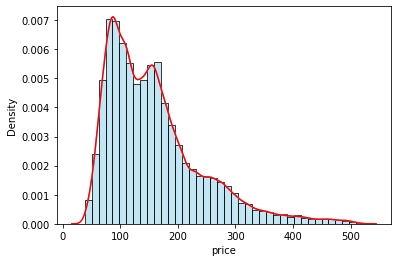

In [ ]:
sns.histplot(data=y, stat='density', bins=40, kde=True, color="skyblue")
sns.kdeplot(y, color='red')

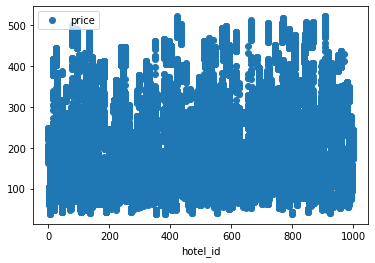

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

#the previous is to overcome a size limitaion 
df_original.plot(x='hotel_id', y='price', style='o')

The plot is not very clear but we can say that the price tag for most hotels is in a large range

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param=[{"n_estimators":[100, 200, 500, 1000],
        "max_features":["sqrt", "log2"],
        "bootstrap": [True],
        "max_depth": [80, 90, 100, 110],
        "max_features": [2, 3],
        "min_samples_leaf": [3, 4, 5],
        "min_samples_split": [8, 10, 12],
        }]
regressor = GridSearchCV(RandomForestRegressor(), param,n_jobs=-1)
regressor.fit(X_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/li

ValueError: ignored

Should convert categorical variables to dummies

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train

,hotel_id,stock,date,mobile,avatar_id,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,...,language_lithuanian,language_luxembourgish,language_maltese,language_polish,language_portuguese,language_romanian,language_slovakian,language_slovene,language_spanish,language_swedish
15086,654,49,24,1,59902,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77072,234,0,1,1,90463,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113265,191,0,1,0,90825,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
37262,132,231,41,0,60111,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146186,463,0,22,0,91125,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,495,55,22,1,90889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,816,4,1,0,90729,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131932,975,33,22,1,90995,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146867,53,12,22,0,91129,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
'''
param=[{"n_estimators":[100, 200, 500, 1000],
        #"max_features":["sqrt", "log2"],
        #"bootstrap": [True],
        #"max_depth": [80, 100],
        #"max_features": [8, 12],
        #"min_samples_leaf": [3, 4, 5],
        #"min_samples_split": [8, 10, 12],
        }]
'''
regressor = RandomForestRegressor(n_estimators=1000,
                                  max_features='log2')
regressor.fit(X_train, y_train)  

In [48]:
Y_pred_test = regressor.predict(X_test)

In [49]:
MAPE(y_test, Y_pred_test)

0.23528860619838915